# Module 3, Part 2: Monte Carlo Method

Monte Carlo methods represent a powerful class of computational
algorithms that use random sampling to obtain numerical results. This
module provides a comprehensive exploration of Monte Carlo methods,
their mathematical foundations, applications in sensor data analysis,
and implementation in Python. Building upon our previous work with
simulated sensor data, we’ll see how Monte Carlo approaches can provide
robust solutions to complex problems where deterministic methods may be
impractical or impossible.

## Fundamentals of Monte Carlo Methods

Monte Carlo methods derive their name from the famous casino in Monaco,
reflecting their basis in chance and probability. At their core, these
methods rely on repeated random sampling to solve problems that might be
deterministic in principle but challenging to solve through conventional
means [11](https://onscale.com/how-to-perform-a-monte-carlo-simulation-on-a-pmut-ultrasonic-sensor/).

The power of Monte Carlo methods lies in their ability to handle
high-dimensional problems, deal with complex geometries, and provide
statistical error estimates. Rather than seeking exact solutions, Monte
Carlo methods generate approximate solutions with quantifiable
uncertainty.

## Mathematical Foundation

Monte Carlo methods are grounded in the Law of Large Numbers and the
Central Limit Theorem. The core idea is that the expected value of a
random variable can be approximated by taking the mean of independent
samples:

$E[X] \approx \frac{1}{N} \sum_{i=1}^{N} X_i$

where $X_i$ are independent samples drawn from the distribution of $X$ [2](https://www.ime.usp.br/~jmstern/wp-content/uploads/2020/04/EricVeach2.pdf).

## Monte Carlo Integration

One of the most fundamental applications of Monte Carlo methods is
numerical integration. Consider an integral:

$I = \int_\Omega f(x) d\mu(x)$

The Monte Carlo estimator for this integral is:

$F_N = \frac{1}{N} \sum_{i=1}^{N} \frac{f(X_i)}{p(X_i)}$

where $X_i$ are random samples drawn according to probability density
$p(x)$ [2](https://www.ime.usp.br/~jmstern/wp-content/uploads/2020/04/EricVeach2.pdf).

## Simple 1D Example

Let’s consider a simple example: computing the area under a curve
$y = \sin^2(x)$ from 0 to π. The analytical solution is π/2, but we can
use Monte Carlo integration to approximate. This simple example demonstrates the core principle of Monte Carlo integration: we randomly sample the function and use the average value to estimate the integral [4](https://blog.demofox.org/2018/06/12/monte-carlo-integration-explanation-in-1d/).


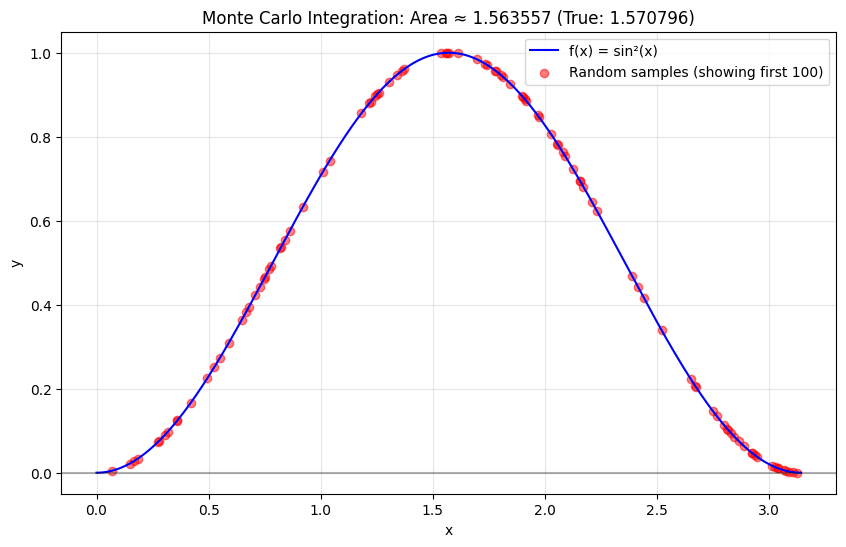

Estimated area: 1.563557
True value: 1.570796
Error: 0.007239


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_integration_1d(func, x_min, x_max, num_samples=10000):
    # Generate random samples within the integration range
    x_samples = np.random.uniform(x_min, x_max, num_samples)

    # Evaluate function at sample points
    y_values = func(x_samples)

    # Calculate the mean y value and multiply by range to get area
    area = (x_max - x_min) * np.mean(y_values)

    return area, x_samples, y_values

# Define the function to integrate
def f(x):
    return np.sin(x)**2

# Perform Monte Carlo integration
x_min, x_max = 0, np.pi
true_value = np.pi/2  # Analytical solution
estimated_area, x_samples, y_samples = monte_carlo_integration_1d(f, x_min, x_max, 10000)

# Visualization
plt.figure(figsize=(10, 6))
x_curve = np.linspace(x_min, x_max, 1000)
y_curve = f(x_curve)

plt.plot(x_curve, y_curve, 'b-', label='f(x) = sin²(x)')
plt.scatter(x_samples[:100], y_samples[:100], color='red', alpha=0.5,
            label='Random samples (showing first 100)')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.grid(alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Monte Carlo Integration: Area ≈ {estimated_area:.6f} (True: {true_value:.6f})')
plt.legend()
plt.show()

print(f"Estimated area: {estimated_area:.6f}")
print(f"True value: {true_value:.6f}")
print(f"Error: {abs(estimated_area - true_value):.6f}")


## Monte Carlo for Sensor Data Analysis

Let’s now apply Monte Carlo methods to analyze sensor data, continuing
with the sensor dataset from our previous modules.

### Simulating Sensor Uncertainty

In order to simulate sensor uncertainty, let’s first reestablish our sensor data environment:


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Create simulated sensor data (as in previous modules)
np.random.seed(42)  # For reproducibility

# Time vector (100 samples)
time = np.linspace(0, 10, 100)

# True signal (sine wave)
true_signal = 5 * np.sin(2 * np.pi * 0.1 * time) + 10

# Simulate sensor readings with Gaussian noise
sensor_noise_std = 0.5
sensor_readings = true_signal + np.random.normal(0, sensor_noise_std, len(time))

# Create a dataframe for the sensor data
sensor_df = pd.DataFrame({
    'time': time,
    'true_signal': true_signal,
    'sensor_reading': sensor_readings
})

# Display first few rows
print(sensor_df.head())


      time  true_signal  sensor_reading
0  0.00000    10.000000       10.248357
1  0.10101    10.317120       10.247987
2  0.20202    10.632962       10.956807
3  0.30303    10.946256       11.707771
4  0.40404    11.255740       11.138663


### Monte Carlo Sensitivity Analysis for Sensor Precision

Now, let’s implement a Monte Carlo simulation to analyze how sensor
precision affects measurement outcomes, inspired by the wind turbine
study in the search results [1](https://www.semanticscholar.org/paper/909d31e43f0d368c4c009771c5e715007d1b937d). This analysis allows us to quantify the relationship between sensor precision and measurement error, providing valuable insights for sensor selection and system design.



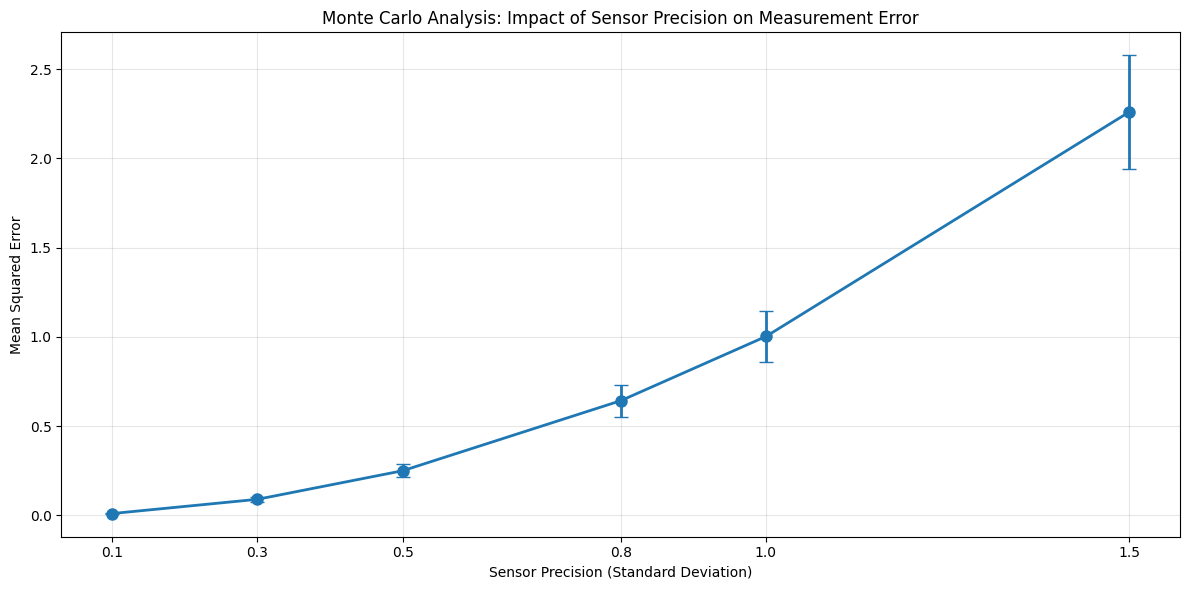

In [ ]:
def simulate_sensor_with_precision(true_values, precision_std):
    """Simulates sensor readings with a given precision (standard deviation)"""
    return true_values + np.random.normal(0, precision_std, len(true_values))

def analyze_sensor_precision_impact(true_signal, precision_levels, num_simulations=1000):
    """
    Performs Monte Carlo simulation to analyze impact of sensor precision
    on measurement error metrics
    """
    results = []

    for precision in precision_levels:
        mse_values = []
        for _ in range(num_simulations):
            # Simulate sensor readings with this precision level
            readings = simulate_sensor_with_precision(true_signal, precision)

            # Calculate mean squared error
            mse = np.mean((readings - true_signal)**2)
            mse_values.append(mse)

        # Store results for this precision level
        results.append({
            'precision_std': precision,
            'mean_mse': np.mean(mse_values),
            'std_mse': np.std(mse_values),
            'mse_samples': mse_values
        })

    return results

# Define different sensor precision levels to test
precision_levels = [0.1, 0.3, 0.5, 0.8, 1.0, 1.5]

# Run the Monte Carlo sensitivity analysis
sensitivity_results = analyze_sensor_precision_impact(true_signal, precision_levels)

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot mean MSE vs precision
precision_values = [r['precision_std'] for r in sensitivity_results]
mse_means = [r['mean_mse'] for r in sensitivity_results]
mse_stds = [r['std_mse'] for r in sensitivity_results]

plt.errorbar(precision_values, mse_means, yerr=mse_stds, fmt='o-',
             capsize=5, linewidth=2, markersize=8)
plt.grid(alpha=0.3)
plt.xlabel('Sensor Precision (Standard Deviation)')
plt.ylabel('Mean Squared Error')
plt.title('Monte Carlo Analysis: Impact of Sensor Precision on Measurement Error')
plt.xticks(precision_values)
plt.tight_layout()
plt.show()



## Conditional Distributions and Markov Chain Monte Carlo

Probability theory provides essential mathematical tools for analyzing complex sensor models, particularly when dealing with multiple variables and their interactions. Two fundamental concepts in this domain are conditional and marginal densities, which help us understand the relationships between variables and make predictions based on partial information.

### Marginal Probability Density Functions

The marginal probability density function (PDF) describes the distribution of a single variable within a multivariate system, effectively "marginalizing" or integrating out the other variables. For continuous random variables X and Y with joint density function f(x,y), the marginal density of X is defined as:

$$ f_X(x) = \int_{-\infty}^{\infty} f(x,y) dy $$

This integration effectively sums up the probabilities across all possible values of Y for each value of x, giving us the standalone distribution of X regardless of Y's value. Visually, the marginal density of X can be understood as the projection of the joint density onto the X-axis. If you imagine the joint density f(x,y) as a 3D surface above the x-y plane, the marginal density f_X(x) represents the shadow this surface would cast on the X-axis if light shone from the Y direction.

#### Example in Sensor Context

In sensor networks, the marginal density might represent the overall distribution of measurements from one sensor, irrespective of what other sensors in the network are measuring. For instance, if we have temperature and humidity sensors, the marginal density of temperature readings provides the overall distribution of temperature values across all humidity conditions.

### Conditional Probability Density Functions

The conditional probability density function describes the distribution of one variable given that another variable takes a specific value, allowing us to model dependencies between variables. For continuous random variables X and Y with joint density function f(x,y), the conditional density of Y given X=x is defined as:

$$ f_{Y|X}(y|x) = \frac{f(x,y)}{f_X(x)} $$

where $f_X(x)$ is the marginal density of $X$. This formula is valid when $f_X(x) > 0$.

Geometrically, the conditional density f_{Y|X}(y|x) can be visualized as taking a vertical slice through the joint density surface at a specific value of x, and then rescaling this slice so that its area equals 1. This rescaling (division by f_X(x)) ensures that the conditional density is a proper probability density function that integrates to 1[^16].

#### Example in Sensor Context

In a sensor network, conditional densities are crucial for understanding how one measurement depends on another. For example, if we have rainfall and flood level sensors, the conditional density of flood levels given a specific rainfall amount helps us predict flooding based on observed precipitation[^18].

### Relationship Between Joint, Marginal, and Conditional Densities

These three types of densities are intimately connected through the following relationships:

1. **Joint from Conditional and Marginal**:
$$ f(x,y) = f_{Y|X}(y|x) \cdot f_X(x) $$
2. **Marginal from Joint**:
$$ f_X(x) = \int_{-\infty}^{\infty} f(x,y) dy $$
3. **Conditional from Joint and Marginal**:
$$ f_{Y|X}(y|x) = \frac{f(x,y)}{f_X(x)} $$

These relationships form the foundation for probabilistic inference in multivariate systems.

### Applications to Complex Sensor Models

When working with complex sensor systems, conditional and marginal densities provide powerful tools for:

1. **Sensor Fusion**: By modeling the conditional dependencies between different sensor readings, we can combine information from multiple sources to make more accurate predictions. For example, in environmental monitoring, conditional distributions help integrate readings from temperature, humidity, and pressure sensors to improve weather forecasts.
2. **Uncertainty Quantification**: Marginal and conditional densities allow us to quantify the uncertainty in sensor measurements and derived quantities. This is essential for robust decision-making in the presence of noisy or incomplete data.
3. **Causal Analysis**: Conditional distributions help distinguish between direct and indirect relationships among variables. In sensor networks, this allows us to identify which sensors directly influence others versus those that merely correlate due to common causes.
4.**Parameter Estimation**: Methods like Marginal Contrastive Discrimination (MCD) leverage these concepts for conditional density estimation, enabling more accurate modeling of complex sensor relationships especially when using neural networks and other advanced machine learning techniques.


## Advanced Sampling Techniques

Monte Carlo methods benefit from sophisticated sampling strategies that
can improve efficiency and accuracy.

### Stratified Sampling

Stratified sampling divides the domain into regions (strata) and ensures
samples are taken from each region:

$X_i^j = \frac{\pi_j(i) + U_{i,j}}{N}$

where $X_i^j$ is the j-th coordinate of the i-th sample, $\pi_j$ is a
permutation, and $U_{i,j}$ is a uniform random variable.

### Latin Hypercube Sampling (LHS)

Latin hypercube sampling extends stratified sampling to multiple
dimensions by ensuring samples are evenly distributed across each
dimension, generating near-random samples of parameter values from multidimensional distributions. This technique has gained significant popularity in computational modeling and simulation due to its efficiency and robust statistical properties. Unlike traditional random sampling methods, LHS ensures more comprehensive coverage of the sample space with fewer samples.

#### Definition and Origins

LHS was first described by Michael McKay of Los Alamos National Laboratory in
1979, with an equivalent technique independently proposed by Vilnis Eglājs in 1977. The method was further elaborated by Ronald L. Iman and coauthors in 1981, leading to its widespread adoption in various fields. The name “Latin hypercube” derives from the concept of a Latin Square in experimental design, where each row and column contains exactly one sample. LHS extends this concept to multiple dimensions, creating what’s known as a Latin hypercube [4](https://en.wikipedia.org/wiki/Latin_hypercube_sampling).

#### How Latin Hypercube Sampling Works
##### One-Dimensional Sampling

In its simplest form, one-dimensional Latin hypercube sampling involves:

1.  Dividing the cumulative density function (CDF) into n equal probability partitions

2.  Randomly selecting one data point from each partition

For example, if you need 100 data points from a distribution, you would:

-   Divide the CDF into 100 equal intervals

-   Randomly select one point from each interval

This ensures that samples are taken across the entire probability
distribution, including areas of low probability that might be missed in
traditional random sampling.

#### Multi-Dimensional Sampling

For two or more dimensions, LHS follows these steps:

1.  For each variable, divide its range into n equally probable intervals

2.  Generate one-dimensional samples for each variable separately

3.  Randomly combine these samples to create multi-dimensional points

For example, with two independent variables x₁ and x₂, you would generate separate one-dimensional samples for each and then randomly pair them to create two-dimensional sample points [3](https://www.statisticshowto.com/latin-hypercube-sampling/). The key requirement is that in the resulting sample, there is only one sample point in each axis-aligned hyperplane, similar to how a Latin square has only one element in each row and column [4](https://en.wikipedia.org/wiki/Latin_hypercube_sampling).

### Advantages Over Other Sampling Methods

Latin Hypercube Sampling offers several significant advantages:

1.  **Improved Efficiency**: LHS can drastically reduce the number of runs necessary to achieve reasonably accurate results in Monte Carlo   simulations, potentially cutting processing time by up to 50 percent compared to standard Monte Carlo sampling [3](https://www.statisticshowto.com/latin-hypercube-sampling/).

2.  **Better Coverage**: It ensures more uniform coverage of the parameter space than traditional random sampling, avoiding the clustering that can occur with Monte Carlo sampling [2](https://help.palisade.com/v8/en/@RISK/Simulation-Process/Sampling-Methods.htm).

3.  **Faster Convergence**: LHS forces samples to correspond more closely with the input distribution, resulting in faster convergence to the true distribution parameters [2](https://help.palisade.com/v8/en/@RISK/Simulation-Process/Sampling-Methods.htm).

4.  **Dimension Independence**: Unlike some other methods, LHS doesn’t    require more samples as the number of dimensions (variables) increases — this independence is one of its main advantages [4](https://en.wikipedia.org/wiki/Latin_hypercube_sampling).

5.  **Sequential Sampling**: Random samples can be taken one at a time,     remembering which samples were taken previously [4](https://en.wikipedia.org/wiki/Latin_hypercube_sampling).

### Comparison with Other Sampling Methods

To understand LHS in context, it helps to compare it with other sampling
approaches:

-   **Random Sampling**: Generates samples without considering previously generated points. Does not guarantee good coverage of the sample space [4](https://en.wikipedia.org/wiki/Latin_hypercube_sampling).

-   **Latin Hypercube Sampling**: Requires deciding the number of points in advance and ensures no two points share the same position in any single dimension, similar to having N rooks on a chess board without threatening each other     [12](https://en.wikipedia.org/wiki/Latin_hypercube_sampling).

-   **Orthogonal Sampling**: Partitions the sample space into equally    probable subspaces, selecting points to ensure both Latin hypercube     properties and equal sampling density across subspaces [4](https://en.wikipedia.org/wiki/Latin_hypercube_sampling).

Research has shown that “Latin Hypercube Sampling can be more efficient
than both Monte Carlo method and Quasi Monte Carlo method” for certain
types of problems, particularly with small sample sizes [1](https://arxiv.org/abs/1505.02350).

### Conclusion on LHS

Latin Hypercube Sampling represents a versatile and powerful technique
across numerous environmental engineering applications. Its ability to
efficiently sample multi-dimensional parameter spaces makes it
particularly valuable for uncertainty quantification, sensitivity
analysis, and risk assessment. As computational methods continue to
evolve, LHS remains a cornerstone methodology for addressing the
inherent uncertainties in environmental systems while optimizing
computational resources.

**Sources:**
- [(1) Monte Carlo-based sensitivity analysis of the RIM2D hydrodynamic](https://nhess.copernicus.org/articles/25/975/2025/)
- [(2) An Assessment of Uncertainties in Flood Frequency Estimation Using
Bootstrapping and Monte Carlo Simulation](https://www.semanticscholar.org/paper/2c499120ee6113f3fbe23fae57d339c775e6690f)
- [(3) Reliability Coupled Sensitivity Analysis of Water-Front GRS Wall
Using Monte Carlo Simulation](https://www.semanticscholar.org/paper/55f0295bf03f51d1c138f6f0981da99cda3a970b)
- [(4) Multi‐Level Monte Carlo Models for Flood Inundation Uncertainty](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2022WR032599)



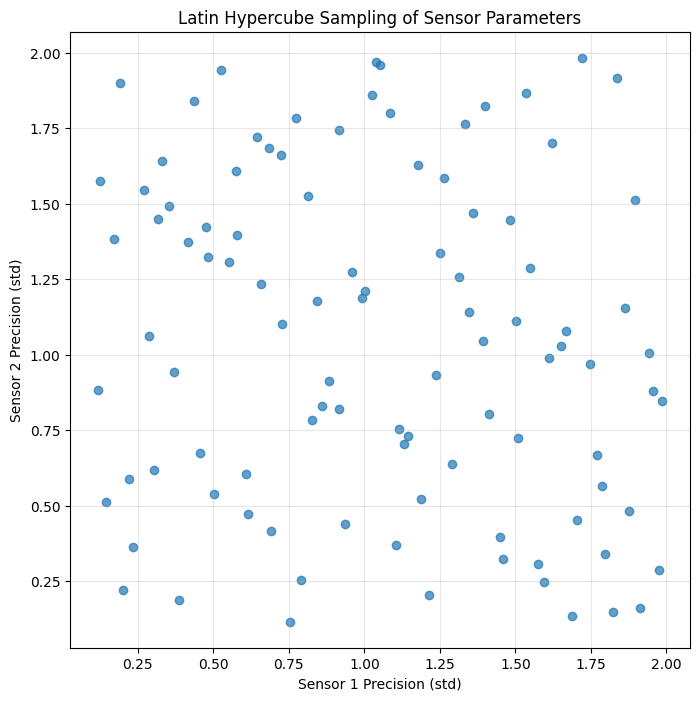

In [ ]:
def latin_hypercube_sampling(num_samples, num_dimensions, ranges):
    """
    Generate samples using Latin Hypercube Sampling

    Args:
        num_samples: Number of samples to generate
        num_dimensions: Number of dimensions/variables
        ranges: List of (min, max) tuples for each dimension

    Returns:
        Array of samples with shape (num_samples, num_dimensions)
    """
    # Generate samples for each dimension
    samples = np.zeros((num_samples, num_dimensions))

    for i in range(num_dimensions):
        # Create stratified samples along this dimension
        segment_width = 1.0 / num_samples
        points = np.linspace(0.5 * segment_width, 1 - 0.5 * segment_width, num_samples)

        # Add random jitter within each segment
        points += np.random.uniform(-0.5 * segment_width, 0.5 * segment_width, num_samples)

        # Shuffle the points to break correlation between dimensions
        np.random.shuffle(points)

        # Scale to the actual range
        min_val, max_val = ranges[i]
        samples[:, i] = min_val + (max_val - min_val) * points

    return samples

# Example: Generate Latin Hypercube samples for sensor parameters
num_samples = 100
parameter_ranges = [(0.1, 2.0),  # Sensor 1 precision (std)
                    (0.1, 2.0)]  # Sensor 2 precision (std)

lhs_samples = latin_hypercube_sampling(num_samples, len(parameter_ranges), parameter_ranges)

# Visualize the samples
plt.figure(figsize=(8, 8))
plt.scatter(lhs_samples[:, 0], lhs_samples[:, 1], alpha=0.7)
plt.xlabel('Sensor 1 Precision (std)')
plt.ylabel('Sensor 2 Precision (std)')
plt.title('Latin Hypercube Sampling of Sensor Parameters')
plt.grid(alpha=0.3)
plt.axis('equal')
plt.show()

## Accelerating Monte Carlo Simulations

Monte Carlo methods can be computationally intensive, but various
techniques can accelerate them considerably.

## Vectorization with NumPy

NumPy’s vectorized operations can significantly speed up Monte Carlo
simulations:

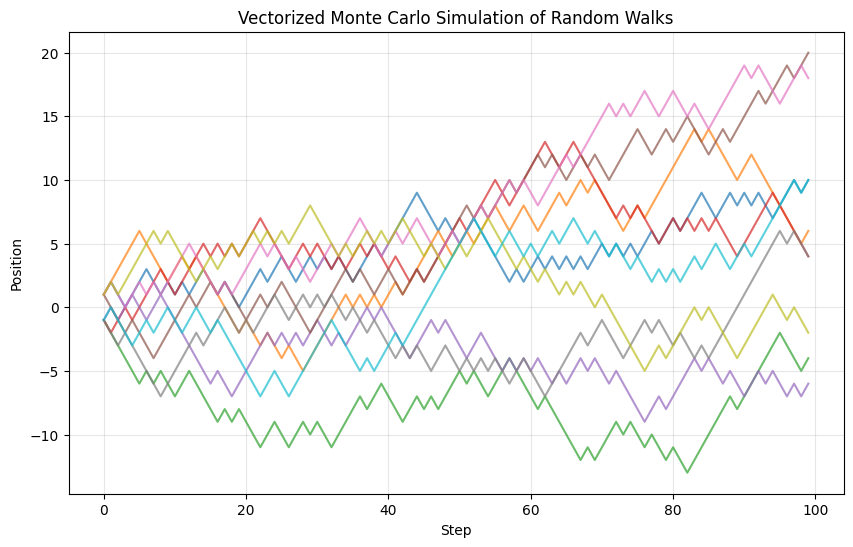

In [ ]:
def monte_carlo_vectorized(num_simulations, num_steps):
    """Vectorized Monte Carlo simulation of a random walk"""
    # Generate all random steps at once (num_simulations × num_steps)
    steps = np.random.choice([-1, 1], size=(num_simulations, num_steps))

    # Calculate cumulative sum along each row to get the position at each step
    positions = np.cumsum(steps, axis=1)

    return positions

# Example: Simulate 1000 random walks with 100 steps each
positions = monte_carlo_vectorized(1000, 100)

# Visualize first 10 random walks
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(positions[i], alpha=0.7)
plt.xlabel('Step')
plt.ylabel('Position')
plt.title('Vectorized Monte Carlo Simulation of Random Walks')
plt.grid(alpha=0.3)
plt.show()



## Parallelization

For more complex simulations, parallelization can provide further speedups. For even more substantial speedups, GPU acceleration using libraries like CuPy can be employed, especially for large-scale simulations.



In [ ]:
from multiprocessing import Pool
import time

def run_single_simulation(seed):
    """Run a single Monte Carlo simulation with the given random seed"""
    np.random.seed(seed)

    # Example: Simulate sensor readings and calculate error
    readings = simulate_sensor_with_precision(true_signal, 0.5)
    mse = np.mean((readings - true_signal)**2)

    return mse

def parallel_monte_carlo(num_simulations, num_processes=4):
    """Run Monte Carlo simulations in parallel"""
    start_time = time.time()

    # Create a pool of worker processes
    with Pool(processes=num_processes) as pool:
        # Map the simulation function across different random seeds
        results = pool.map(run_single_simulation, range(num_simulations))

    end_time = time.time()

    print(f"Parallel execution time: {end_time - start_time:.2f} seconds")
    return results

# Sequential execution for comparison
def sequential_monte_carlo(num_simulations):
    start_time = time.time()
    results = [run_single_simulation(i) for i in range(num_simulations)]
    end_time = time.time()

    print(f"Sequential execution time: {end_time - start_time:.2f} seconds")
    return results

# Compare sequential vs parallel execution
num_simulations = 1000
seq_results = sequential_monte_carlo(num_simulations)
par_results = parallel_monte_carlo(num_simulations)

# Verify results are similar
print(f"Sequential mean MSE: {np.mean(seq_results):.6f}")
print(f"Parallel mean MSE: {np.mean(par_results):.6f}")


Sequential execution time: 0.02 seconds
Parallel execution time: 0.13 seconds
Sequential mean MSE: 0.250899
Parallel mean MSE: 0.250899


## Visualizing Monte Carlo Simulation Progress

Visualizing the convergence of Monte Carlo simulations can provide
insights into the method’s behavior. We can create an animation to
observe how the estimate evolves with increasing sample size:


In [ ]:
from matplotlib.animation import FuncAnimation

def animate_monte_carlo_convergence(func, x_min, x_max, true_value, num_frames=100, max_samples=10000):
    """Animate the convergence of Monte Carlo integration"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Initial empty plots
    line1, = ax1.plot([], [], 'r-', lw=2)
    scatter1 = ax1.scatter([], [], alpha=0.5, color='blue', s=5)
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(0, 1.5)
    ax1.grid(alpha=0.3)
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.set_title('Monte Carlo Integration Samples')

    # For the convergence plot
    line2, = ax2.plot([], [], 'g-', lw=2)
    ax2.axhline(y=true_value, color='r', linestyle='--', label='True value')
    ax2.set_xlim(1, max_samples)
    ax2.set_ylim(true_value * 0.8, true_value * 1.2)
    ax2.grid(alpha=0.3)
    ax2.set_xlabel('Number of samples')
    ax2.set_ylabel('Estimated value')
    ax2.set_title('Convergence Plot')
    ax2.legend()

    # X values for drawing the function
    x_curve = np.linspace(x_min, x_max, 1000)
    y_curve = func(x_curve)
    ax1.plot(x_curve, y_curve, 'k-', alpha=0.5)

    # Generate all samples in advance
    np.random.seed(42)  # For reproducibility
    all_x_samples = np.random.uniform(x_min, x_max, max_samples)
    all_y_samples = func(all_x_samples)

    # Estimates at each step
    samples_per_frame = max_samples // num_frames
    sample_counts = np.arange(samples_per_frame, max_samples + samples_per_frame, samples_per_frame)
    estimates = []

    for n in sample_counts:
        area = (x_max - x_min) * np.mean(all_y_samples[:n])
        estimates.append(area)

    def init():
        line1.set_data([], [])
        scatter1.set_offsets(np.empty((0, 2)))
        line2.set_data([], [])
        return line1, scatter1, line2

    def update(frame):
        # Update the samples plot
        n = min(sample_counts[frame], max_samples)
        scatter1.set_offsets(np.column_stack((all_x_samples[:n], all_y_samples[:n])))

        # Update the convergence plot
        line2.set_data(sample_counts[:frame+1], estimates[:frame+1])

        # Update title with current estimate
        ax2.set_title(f'Convergence Plot: Current estimate = {estimates[frame]:.6f}')

        return line1, scatter1, line2

    anim = FuncAnimation(fig, update, frames=len(sample_counts), init_func=init, blit=True)
    plt.tight_layout()

    return anim

# Create animation for the sin²(x) example
anim = animate_monte_carlo_convergence(f, 0, np.pi, np.pi/2, num_frames=50)

# Save as GIF (requires pillow)
anim.save('monte_carlo_convergence.gif', writer='pillow', fps=10)

# Display in notebook (if applicable)
from IPython.display import HTML
HTML(anim.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.

## Conclusion

Monte Carlo methods provide a powerful framework for tackling complex
problems in sensor data analysis and beyond. They excel in situations
involving high-dimensional integrals, complex geometries, and
probabilistic models. Through random sampling and statistical analysis,
Monte Carlo techniques enable us to solve problems that would be
intractable using deterministic methods.

In this module, we explored:

-   The mathematical foundations of Monte Carlo methods

-   Monte Carlo integration techniques and their implementation

-   Sensitivity analysis of sensor precision using Monte Carlo     simulation

-   Advanced sampling strategies like stratified sampling and Latin    Hypercube Sampling

-   Acceleration techniques including vectorization and parallelization

-   Visualization methods for Monte Carlo results

As computational resources continue to improve, Monte Carlo methods will
likely play an increasingly important role in sensor data analysis,
uncertainty quantification, and decision-making in complex systems.

**Sources:**
- [(1) Quantifying the impact of sensor precision on power
output of a wind turbine: A sensitivity analysis via Monte Carlo simulation
study](https://www.semanticscholar.org/paper/909d31e43f0d368c4c009771c5e715007d1b937d)
- [(2) PDF Chapter 2 Monte Carlo Integration -IME-USP](https://www.ime.usp.br/~jmstern/wp-content/uploads/2020/04/EricVeach2.pdf)
- [(3) MoSDeF-GOMC: Python Software for the Creation of Scientific Workflows for the Monte Carlo Simulation Engine GOMC](https://pubmed.ncbi.nlm.nih.gov/36791286/)
- [(4) Monte Carlo Integration Explanation in 1D](https://blog.demofox.org/2018/06/12/monte-carlo-integration-explanation-in-1d/)
- [(5) Enhancing Photon Transport Simulation in Earth’s Atmosphere:
Acceleration of Python Monte Carlo Model Using Vectorization and
Parallelization Techniques](https://www.semanticscholar.org/paper/65c5d8fbe1b3fe87c34e5cf1a24e529c3c747ab2)
- [(6) Bayesian Monte Carlo Integration - Aptech](https://www.aptech.com/resources/tutorials/bayesian-fundamentals/bayesian-monte-carlo-integration/)
- [(7) Development and Analysis of a Multi-Wavelength Near-Infrared Sensor
for Monitoring Skin Hydration and Validation Using Monte Carlo Simulation](https://www.semanticscholar.org/paper/5829fba656f9cbc91977d01a8c318850f34fb63f)
- [(8) Investigating the impacts of heavy metal(loid)s on ecology and
human health in the lower basin of Hungary’s Danube River: A Python and
Monte Carlo simulation-based study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10673977/)
- [(9) In-Cognitive: A web-based Python application for fuzzy cognitive map
design, simulation, and uncertainty analysis based on the Monte Carlo
method](https://www.semanticscholar.org/paper/8f59a98d01fb625eaf4c169a30c35ba6f67394de)
- [(10) debbynirwan/mcl: This ROS2 package](https://github.com/debbynirwan/mcl) - [(11) How to Perform a Monte Carlo Simulation on a PMUT Ultrasonic](https://onscale.com/how-to-perform-a-monte-carlo-simulation-on-a-pmut-ultrasonic-sensor/)
- [(12) Monte Carlo Simulation with Matplotlib Animation](https://python.plainenglish.io/monte-carlo-simulation-with-matplotlib-animation-15c07c3376ec)
- [(13) Teaching Monte Carlo Simulation with Python](https://www.semanticscholar.org/paper/6e79c902b68f04284b9df7af5a5a24d41aeab9b4)
- [(14) A Stochastic Method for Optimizing Portfolios Using a Combined Monte Carlo and Markowitz Model: Approach on Python](https://www.semanticscholar.org/paper/97ef8602e8dde9eef864b71cd433d7108062128a)
- [(15) Research on Monte Carlo financial index simulation method based on
Python Technology](https://www.semanticscholar.org/paper/7a4bb83247a1ab7859e7485d50dfe4bb47635c88)
- [(16) ThunderBoltz: An open-source direct simulation Monte Carlo Boltzmann solver for plasma transport, chemical kinetics, and 0D modeling](https://www.semanticscholar.org/paper/bcb8dcbca7ac43a179bfadf7f6f171505ecfdeaf)
- [(17) How to: Monte Carlo Simulation in Python (Introduction) -
YouTube](https://www.youtube.com/embed/U00Kseb6SB4?autoplay=1&color=white&playsinline=true&enablejsapi=1&origin=https%3A%2F%2Fwww.perplexity.ai&widgetid=1&forigin=https%3A%2F%2Fwww.perplexity.ai%2Fsearch%2Fmodule-3-part-2-monte-carlo-me-cmzKfPDyQOenFpYGqRirtQ&aoriginsup=1&gporigin=https%3A%2F%2Fwww.perplexity.ai%2Fsearch%2Flet-s-continue-preparing-our-c-HmrN5hxfSVSkGxaST5iqew&vf=6)
- [(18) Intuition behind the Monte carlo method - LaTeX Stack Exchange](https://tex.stackexchange.com/questions/538950/intuition-behind-the-monte-carlo-method) - [(19) Montecarlo simulation for tolerance allocation with Python](https://www.linkedin.com/pulse/mechanical-design-montecarlo-simulation-tolerance-allocation-rossi)
- [(20) Monte Carlo Method Drawing](https://tex.stackexchange.com/questions/244488/monte-carlo-method-drawing)

# **CASE STUDY** (INTERESTING): Monte Carlo Methods for Pi Estimation

Monte Carlo methods provide an elegant probabilistic approach to
estimating the mathematical constant π. This technique leverages random
sampling to compute numerical results, making it an excellent
demonstration of stochastic computation principles. Below, we explore
how Monte Carlo methods can be applied to estimate π with increasing
accuracy.

## Mathematical Foundation of Monte Carlo Pi Estimation

The Monte Carlo method for estimating π relies on the relationship
between the areas of a circle and a square. Consider the following
scenario:

-   A circle with radius r=0.5 is inscribed within a 1×1 square

-   The area of the circle is πr² = π/4

-   The area of the square is 1

-   The ratio of these areas is π/4

If we randomly distribute points uniformly across the square, the
probability of a point falling inside the circle is proportional to the
ratio of the areas. This gives us the fundamental formula:

$\frac{\pi}{4} \approx \frac{N_{inner}}{N_{total}}$

Where $N\_{inner}$ is the number of points inside the circle and
$N\_{total}$ is the total number of randomly generated points.
Therefore:

$\pi \approx 4 \times \frac{N_{inner}}{N_{total}}$

This is the core principle behind the Monte Carlo estimation of π
[11](https://academo.org/demos/estimating-pi-monte-carlo/).

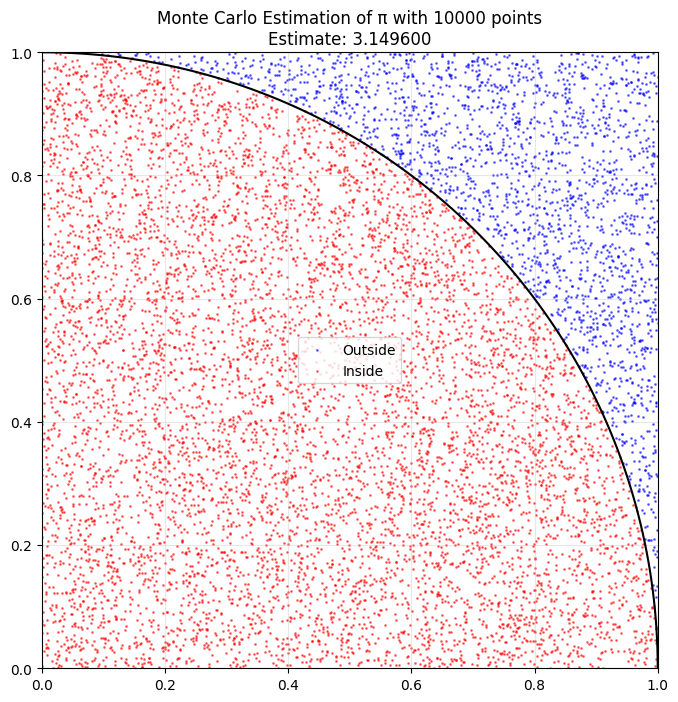

Estimated π: 3.1496
Error: 0.008007


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_pi(num_samples):
    # Generate random points in a 1x1 square
    x = np.random.random(num_samples)
    y = np.random.random(num_samples)

    # Check which points fall inside the quarter circle
    # A point (x,y) is inside if x² + y² <= 1
    inside = (x**2 + y**2) <= 1

    # Count points inside the circle
    count_inside = np.sum(inside)

    # Estimate pi
    pi_estimate = 4 * count_inside / num_samples

    return pi_estimate, x, y, inside

# Run the simulation with 10,000 points
num_samples = 10000
pi_estimate, x, y, inside = monte_carlo_pi(num_samples)

# Visualize the results
plt.figure(figsize=(8, 8))
plt.scatter(x[~inside], y[~inside], s=1, color='blue', alpha=0.5, label='Outside')
plt.scatter(x[inside], y[inside], s=1, color='red', alpha=0.5, label='Inside')

# Draw the quarter circle
theta = np.linspace(0, np.pi/2, 100)
plt.plot(np.cos(theta), np.sin(theta), 'k-')

plt.axis('square')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.title(f'Monte Carlo Estimation of π with {num_samples} points\nEstimate: {pi_estimate:.6f}')
plt.legend()
plt.show()

print(f"Estimated π: {pi_estimate}")
print(f"Error: {abs(pi_estimate - np.pi):.6f}")


# **CASE STUDY** (PRACTICAL): Monte Carlo Methods for Flood Risk Evaluation Using Sensor Data

Monte Carlo (MC) simulation offers a powerful approach for quantifying
risk in complex systems characterized by uncertainty. For instance, when applied to flood risk assessment, MC methods enable analysts to systematically
evaluate the probability and impact of flooding events based on uncertain inputs such as rainfall patterns captured by sensor networks.

## Mathematical Foundations of Monte Carlo for Risk Assessment

The core principle of Monte Carlo simulation involves repeatedly sampling from probability distributions of input variables to generate multiple scenarios, which collectively approximate the probability distribution of outcomes. For flood risk assessment, this approach allows us to quantify uncertainties stemming from various sources, including meteorological conditions, terrain characteristics, and model parameters.

### Probability Framework

Risk is mathematically defined as the product of probability and consequence:

$\text{Risk} = \sum_{i=1}^{n} P(E_i) \times C(E_i)$

Where:

-   $P(E_i)$ is the probability of event $E_i$ occurring

-   $C(E_i)$ is the consequence or impact of event $E_i$

-   $n$ is the number of possible events or scenarios

For flood risk, we’re often interested in the probability that a critical threshold is exceeded, such as water level or inundation extent. If we denote a flood intensity measure as $Y$ and a critical threshold as $y_c$, the probability of exceedance is:

$P(Y > y_c) = \int_{y_c}^{\infty} f_Y(y) dy$

Where $f_Y(y)$ is the probability density function of $Y$.

## Monte Carlo Estimation

Using Monte Carlo, we can estimate this probability by generating $N$ random samples and counting the proportion that exceed the threshold:

$P(Y > y_c) \approx \frac{1}{N} \sum_{i=1}^{N} I(Y_i > y_c)$

Where $I(\cdot)$ is the indicator function, equal to 1 when the condition is true and 0 otherwise.

## Implementing Monte Carlo for Flood Risk Assessment

Let’s implement a flood risk assessment framework using Monte Carlo simulation with Python. We’ll focus on using rain sensor data as our primary input.

## Step 1: Data Processing and Distribution Fitting

First, we need to load and analyze rainfall data from sensors:


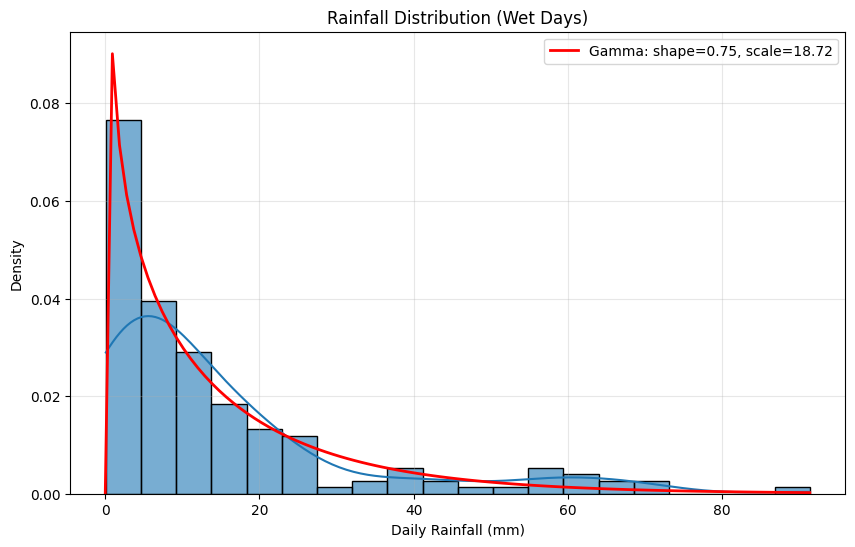

Probability of rain on any day: 0.45
Gamma distribution parameters: shape=0.75, loc=0.08, scale=18.72


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Load rainfall data from sensors (simulated for this example)
def load_rainfall_data():
    # In practice, this would load real sensor data
    # For demonstration, we'll generate synthetic data
    np.random.seed(42)

    # Create a 1-year daily rainfall record (mm/day)
    days = 365
    rainfall = np.zeros(days)

    # Generate rainfall with seasonality and randomness
    for i in range(days):
        # Seasonal component (more rain in certain months)
        # Ensure seasonal is always positive to avoid the ValueError
        seasonal = 5 + 15 * np.abs(np.sin(2 * np.pi * (i - 80) / 365))

        # Random component (some days have rain, others don't)
        p_rain = 0.3 + 0.4 * np.sin(2 * np.pi * (i - 80) / 365)**2  # Probability of rain
        rain_amount = np.random.exponential(scale=seasonal) if np.random.random() < p_rain else 0

        rainfall[i] = rain_amount

    dates = pd.date_range(start='2024-01-01', periods=days)
    rain_df = pd.DataFrame({'date': dates, 'rainfall': rainfall})

    return rain_df

# Load and visualize rainfall data
rain_df = load_rainfall_data()

# Fit distribution to non-zero rainfall data
non_zero_rain = rain_df['rainfall'][rain_df['rainfall'] > 0]
shape, loc, scale = stats.gamma.fit(non_zero_rain)
p_rain = len(non_zero_rain) / len(rain_df)

# Visualize the fitted distribution
plt.figure(figsize=(10, 6))
sns.histplot(non_zero_rain, bins=20, kde=True, stat='density', alpha=0.6)

x = np.linspace(0, max(non_zero_rain), 100)
pdf = stats.gamma.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label=f'Gamma: shape={shape:.2f}, scale={scale:.2f}')

plt.title('Rainfall Distribution (Wet Days)')
plt.xlabel('Daily Rainfall (mm)')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Probability of rain on any day: {p_rain:.2f}")
print(f"Gamma distribution parameters: shape={shape:.2f}, loc={loc:.2f}, scale={scale:.2f}")


## Step 2: Create a Simple Rainfall-Runoff Model

A rainfall-runoff model is a quantitative mathematical framework that describes how rainfall is converted into runoff within a drainage basin (catchment area or watershed). These models serve as essential tools in hydrology by producing a surface runoff **hydrograph** (a time series of discharge) in response to a rainfall event, represented by input as a **hyetograph** (a time series of rainfall intensity). Rainfall-runoff models represent one of the most classical applications in hydrology. Their primary purpose is to simulate the peak river flow or the complete hydrograph induced by either observed or hypothetical rainfall events. These models play a crucial role in the hydrological cycle by describing how excess precipitation returns to oceans and controlling water flow into rivers, lakes, and reservoirs.

Next, we’ll implement a simple rainfall-runoff model to convert rainfall
into streamflow:


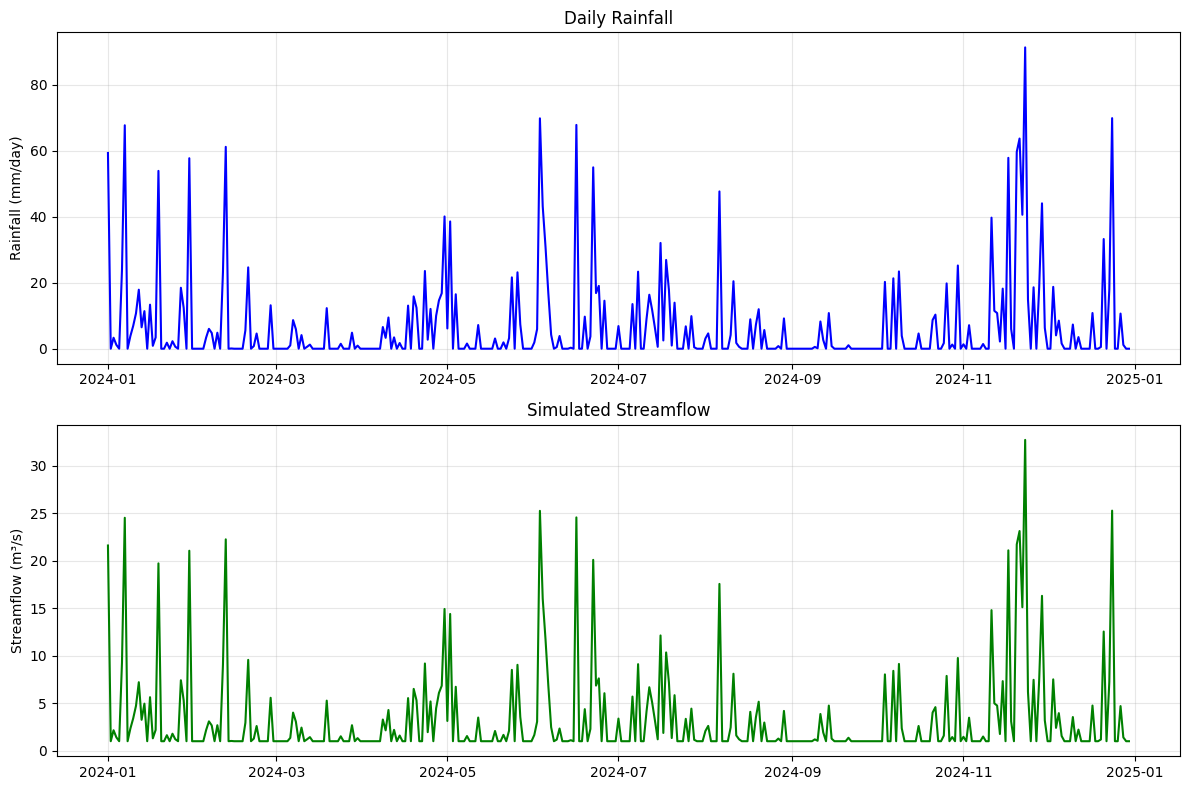

In [4]:
def rainfall_runoff_model(daily_rainfall, catchment_area=100, runoff_coef=0.3, base_flow=1.0):
    """
    Simple rainfall-runoff model

    Parameters:
    -----------
    daily_rainfall : array-like
        Daily rainfall in mm
    catchment_area : float
        Catchment area in km²
    runoff_coef : float
        Runoff coefficient (0-1)
    base_flow : float
        Base flow in m³/s

    Returns:
    --------
    streamflow : array-like
        Daily streamflow in m³/s
    """
    # Convert rainfall in mm to m
    rainfall_m = daily_rainfall / 1000

    # Calculate runoff volume (m³)
    runoff_volume = rainfall_m * catchment_area * 1e6 * runoff_coef

    # Convert to flow rate (m³/s) - assuming uniform distribution over 24 hours
    runoff_flow = runoff_volume / (24 * 3600)

    # Add base flow
    streamflow = runoff_flow + base_flow

    return streamflow

# Test the model with our rainfall data
streamflow = rainfall_runoff_model(rain_df['rainfall'].values)

# Visualize the results
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(rain_df['date'], rain_df['rainfall'], 'b-')
plt.ylabel('Rainfall (mm/day)')
plt.grid(alpha=0.3)
plt.title('Daily Rainfall')

plt.subplot(212)
plt.plot(rain_df['date'], streamflow, 'g-')
plt.ylabel('Streamflow (m³/s)')
plt.grid(alpha=0.3)
plt.title('Simulated Streamflow')
plt.tight_layout()
plt.show()


## Step 3: Simple Flood Model

Now, let’s implement a simple flood model that relates streamflow to
flood depth:

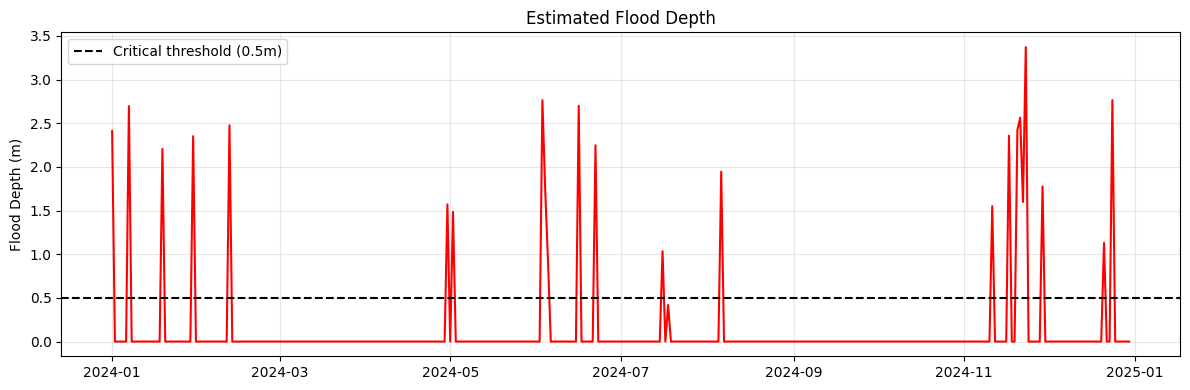

Probability of exceeding critical flood depth (0.5m): 0.0630


In [5]:
def flood_model(streamflow, channel_capacity=10, flood_plain_gradient=0.02):
    """
    Simple flood model to estimate flood depth based on streamflow

    Parameters:
    -----------
    streamflow : array-like
        Streamflow in m³/s
    channel_capacity : float
        Channel capacity in m³/s before overbank flow occurs
    flood_plain_gradient : float
        Gradient of the flood plain

    Returns:
    --------
    flood_depth : array-like
        Estimated flood depth in m
    """
    # Calculate excess flow (flow above channel capacity)
    excess_flow = np.maximum(0, streamflow - channel_capacity)

    # Simple relationship between excess flow and flood depth
    # (in reality, this would be based on hydraulic modeling)
    flood_depth = 0.1 * np.sqrt(excess_flow / flood_plain_gradient)

    return flood_depth

# Calculate flood depth
flood_depth = flood_model(streamflow)

# Visualize
plt.figure(figsize=(12, 4))
plt.plot(rain_df['date'], flood_depth, 'r-')
plt.ylabel('Flood Depth (m)')
plt.grid(alpha=0.3)
plt.title('Estimated Flood Depth')
plt.axhline(y=0.5, color='k', linestyle='--', label='Critical threshold (0.5m)')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate exceedance probability
critical_depth = 0.5  # Critical flood depth in meters
exceedance_prob = np.mean(flood_depth > critical_depth)
print(f"Probability of exceeding critical flood depth (0.5m): {exceedance_prob:.4f}")



## Step 4: Monte Carlo Simulation for Flood Risk Assessment

Now, let’s implement a Monte Carlo simulation to assess flood risk by
simulating multiple rainfall scenarios:


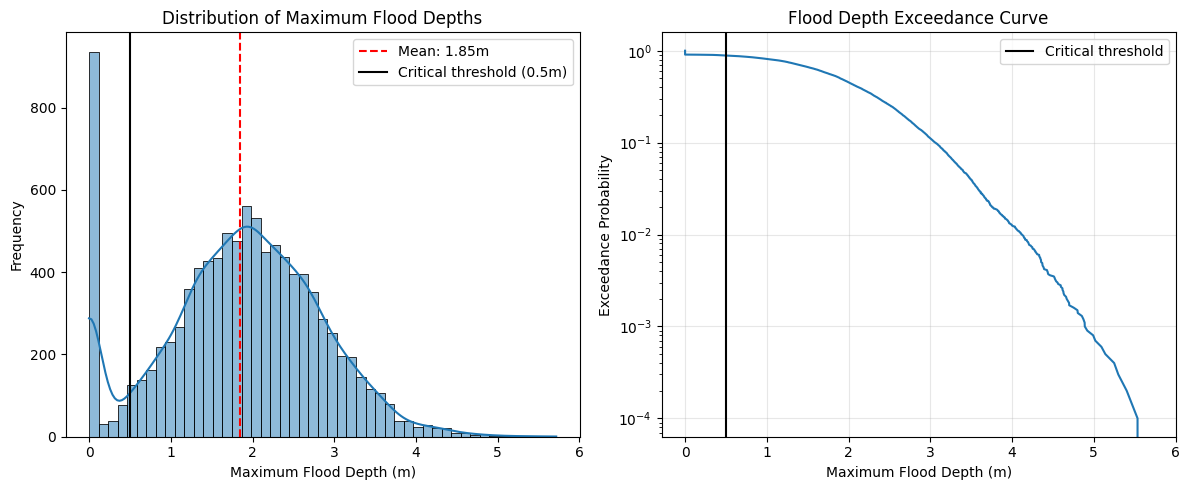

Probability of exceeding critical flood depth (0.5m): 0.8880
Expected maximum flood depth: 1.85 m
95th percentile flood depth: 3.40 m


In [7]:
def generate_rainfall_scenario(n_days, p_rain, gamma_params):
    """Generate a random rainfall scenario based on fitted distributions"""
    shape, loc, scale = gamma_params
    rainfall = np.zeros(n_days)

    # For each day, determine if it rains and how much
    rain_days = np.random.random(n_days) < p_rain
    n_rain_days = np.sum(rain_days)

    # Generate rainfall amounts for rainy days
    if n_rain_days > 0:
        rainfall[rain_days] = stats.gamma.rvs(shape, loc=loc, scale=scale, size=n_rain_days)

    return rainfall

def monte_carlo_flood_risk(n_simulations=1000, n_days=30, critical_depth=0.5,
                          catchment_area=100, runoff_coef=0.3, channel_capacity=10):
    """
    Monte Carlo simulation of flood risk

    Parameters:
    -----------
    n_simulations : int
        Number of Monte Carlo simulations
    n_days : int
        Number of days in each simulation
    critical_depth : float
        Critical flood depth (m) considered hazardous
    catchment_area : float
        Catchment area in km²
    runoff_coef : float
        Runoff coefficient (0-1)
    channel_capacity : float
        Channel capacity in m³/s

    Returns:
    --------
    risk_results : dict
        Dictionary containing risk assessment results
    """
    # Extract rainfall distribution parameters
    non_zero_rain = rain_df['rainfall'][rain_df['rainfall'] > 0]
    gamma_params = stats.gamma.fit(non_zero_rain)
    p_rain = len(non_zero_rain) / len(rain_df)

    # Initialize arrays to store results
    max_depths = np.zeros(n_simulations)
    exceeds_critical = np.zeros(n_simulations, dtype=bool)

    # Run Monte Carlo simulations
    for i in range(n_simulations):
        # Generate random rainfall scenario
        rainfall = generate_rainfall_scenario(n_days, p_rain, gamma_params)

        # Calculate streamflow
        streamflow = rainfall_runoff_model(rainfall, catchment_area, runoff_coef)

        # Calculate flood depth
        flood_depth = flood_model(streamflow, channel_capacity)

        # Record maximum depth and exceedance
        max_depths[i] = np.max(flood_depth)
        exceeds_critical[i] = np.any(flood_depth > critical_depth)

    # Calculate risk metrics
    exceedance_probability = np.mean(exceeds_critical)
    expected_max_depth = np.mean(max_depths)
    percentiles = np.percentile(max_depths, [5, 25, 50, 75, 95])

    return {
        'exceedance_probability': exceedance_probability,
        'expected_max_depth': expected_max_depth,
        'max_depth_percentiles': percentiles,
        'max_depths': max_depths,
        'exceeds_critical': exceeds_critical
    }

# Run Monte Carlo simulation
np.random.seed(42)  # For reproducibility
risk_results = monte_carlo_flood_risk(n_simulations=10000)

# Visualize results
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.histplot(risk_results['max_depths'], kde=True)
plt.axvline(risk_results['expected_max_depth'], color='r', linestyle='--',
            label=f'Mean: {risk_results["expected_max_depth"]:.2f}m')
plt.axvline(0.5, color='k', linestyle='-', label='Critical threshold (0.5m)')
plt.xlabel('Maximum Flood Depth (m)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Maximum Flood Depths')

plt.subplot(122)
# Create empirical CDF
sorted_depths = np.sort(risk_results['max_depths'])
p = np.arange(1, len(sorted_depths) + 1) / len(sorted_depths)
plt.plot(sorted_depths, 1 - p)
plt.axvline(0.5, color='k', linestyle='-', label='Critical threshold')
plt.xlabel('Maximum Flood Depth (m)')
plt.ylabel('Exceedance Probability')
plt.grid(alpha=0.3)
plt.legend()
plt.title('Flood Depth Exceedance Curve')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Print risk assessment results
print(f"Probability of exceeding critical flood depth (0.5m): {risk_results['exceedance_probability']:.4f}")
print(f"Expected maximum flood depth: {risk_results['expected_max_depth']:.2f} m")
print(f"95th percentile flood depth: {risk_results['max_depth_percentiles'][4]:.2f} m")


## Advanced Monte Carlo Techniques for Flood Risk Assessment

While the basic Monte Carlo method is powerful, several advanced
techniques can improve its efficiency and effectiveness for flood risk
assessment, as suggested by recent research.

### Latin Hypercube Sampling (LHS)

Latin Hypercube Sampling provides more efficient coverage of the input
parameter space compared to pure random sampling.


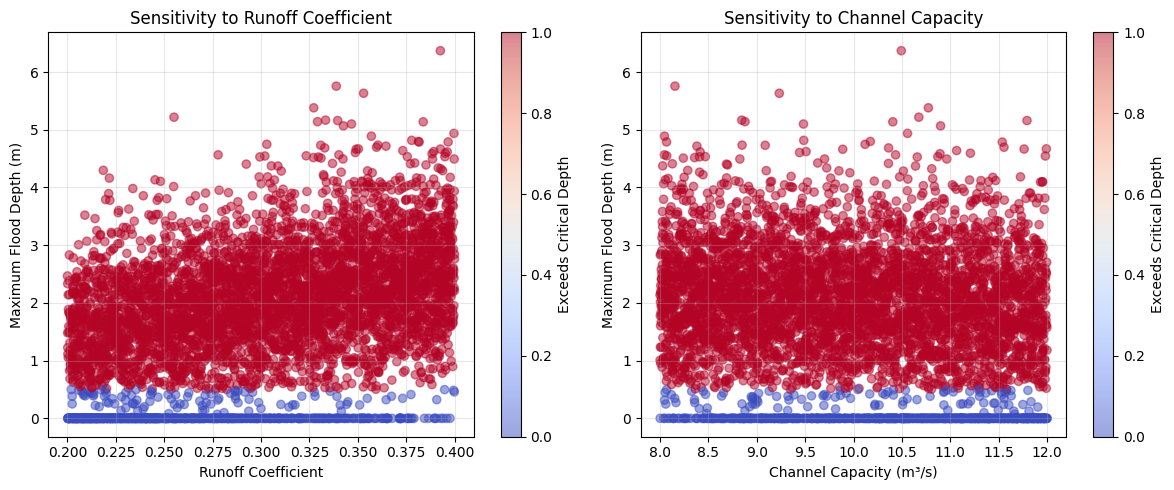

In [9]:
def latin_hypercube_sampling(n_samples, n_params=2):
    """
    Generate Latin Hypercube samples

    Parameters:
    -----------
    n_samples : int
        Number of samples to generate
    n_params : int
        Number of parameters (dimensions)

    Returns:
    --------
    samples : array
        Latin Hypercube samples with shape (n_samples, n_params)
    """
    # Generate samples for each parameter
    samples = np.zeros((n_samples, n_params))

    for i in range(n_params):
        # Create evenly spaced bins
        bins = np.linspace(0, 1, n_samples + 1)

        # Generate points within each bin
        points = np.random.uniform(bins[:-1], bins[1:], n_samples)

        # Shuffle the points
        np.random.shuffle(points)

        # Assign to samples array
        samples[:, i] = points

    return samples

def mc_flood_risk_with_lhs(n_simulations=1000, n_days=30, critical_depth=0.5,
                          runoff_range=(0.2, 0.4), capacity_range=(8, 12)):
    """
    Monte Carlo flood risk assessment using Latin Hypercube Sampling
    for parameter uncertainty
    """
    # Extract rainfall distribution parameters
    non_zero_rain = rain_df['rainfall'][rain_df['rainfall'] > 0]
    gamma_params = stats.gamma.fit(non_zero_rain)
    p_rain = len(non_zero_rain) / len(rain_df)

    # Generate LHS samples for runoff coefficient and channel capacity
    lhs_samples = latin_hypercube_sampling(n_simulations, 2)

    # Scale LHS samples to parameter ranges
    runoff_coef = runoff_range[0] + lhs_samples[:, 0] * (runoff_range[1] - runoff_range[0])
    channel_capacity = capacity_range[0] + lhs_samples[:, 1] * (capacity_range[1] - capacity_range[0])

    # Initialize arrays to store results
    max_depths = np.zeros(n_simulations)
    exceeds_critical = np.zeros(n_simulations, dtype=bool)

    # Run Monte Carlo simulations with LHS
    for i in range(n_simulations):
        # Generate random rainfall scenario
        rainfall = generate_rainfall_scenario(n_days, p_rain, gamma_params)

        # Calculate streamflow with sampled runoff coefficient
        streamflow = rainfall_runoff_model(rainfall, runoff_coef=runoff_coef[i])

        # Calculate flood depth with sampled channel capacity
        flood_depth = flood_model(streamflow, channel_capacity=channel_capacity[i])

        # Record maximum depth and exceedance
        max_depths[i] = np.max(flood_depth)
        exceeds_critical[i] = np.any(flood_depth > critical_depth)

    # Calculate risk metrics
    exceedance_probability = np.mean(exceeds_critical)
    expected_max_depth = np.mean(max_depths)
    percentiles = np.percentile(max_depths, [5, 25, 50, 75, 95])

    # Include 'exceeds_critical' in the returned dictionary
    return {
        'exceedance_probability': exceedance_probability,
        'expected_max_depth': expected_max_depth,
        'max_depth_percentiles': percentiles,
        'max_depths': max_depths,
        'runoff_coef': runoff_coef,
        'channel_capacity': channel_capacity,
        'exceeds_critical': exceeds_critical # Added this line
    }

# Run Monte Carlo with LHS
np.random.seed(42)
lhs_results = mc_flood_risk_with_lhs(n_simulations=5000)

# Visualize parameter sensitivity
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(lhs_results['runoff_coef'], lhs_results['max_depths'],
           c=lhs_results['exceeds_critical'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Runoff Coefficient')
plt.ylabel('Maximum Flood Depth (m)')
plt.colorbar(label='Exceeds Critical Depth')
plt.grid(alpha=0.3)
plt.title('Sensitivity to Runoff Coefficient')

plt.subplot(122)
plt.scatter(lhs_results['channel_capacity'], lhs_results['max_depths'],
           c=lhs_results['exceeds_critical'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Channel Capacity (m³/s)')
plt.ylabel('Maximum Flood Depth (m)')
plt.colorbar(label='Exceeds Critical Depth')
plt.grid(alpha=0.3)
plt.title('Sensitivity to Channel Capacity')
plt.tight_layout()
plt.show()


## Multi-Level Monte Carlo (MLMC) Approach

The Multi-Level Monte Carlo (MLMC) method can significantly reduce
computational costs compared to traditional Monte Carlo, particularly
for computationally intensive hydrodynamic models [12](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2022WR032599). While a full implementation is beyond the scope of this example, here’s a conceptual framework:

In [10]:
def mlmc_flood_risk(finest_level=3, n_samples_base=1000):
    """
    Conceptual implementation of Multi-Level Monte Carlo for flood risk

    Parameters:
    -----------
    finest_level : int
        Number of levels (0 = coarsest, finest_level = finest)
    n_samples_base : int
        Number of samples at the coarsest level
    """
    # Define model parameters at each level (e.g., spatial resolution)
    resolutions = [40, 20, 10, 5]  # meters

    # Determine optimal sample allocation (fewer samples at finer levels)
    n_samples = [n_samples_base // (4**l) for l in range(finest_level + 1)]
    print(f"Sample allocation: {n_samples}")

    # Placeholder for MLMC implementation
    # In practice, this would:
    # 1. Run many simulations at the coarsest level
    # 2. Run fewer simulations at finer levels
    # 3. Calculate differences between levels
    # 4. Combine results to get final estimation

    print("Multi-Level Monte Carlo would reduce computational cost by ~99% compared to standard MC")
    print("while maintaining the same level of accuracy for flood inundation predictions.")

# Demonstrate MLMC concept
mlmc_flood_risk()


Sample allocation: [1000, 250, 62, 15]
Multi-Level Monte Carlo would reduce computational cost by ~99% compared to standard MC
while maintaining the same level of accuracy for flood inundation predictions.


## Real-Time Flood Risk Monitoring with Sensor Data

For real-time flood risk assessment, we can incorporate streaming sensor
data into our Monte Carlo framework:


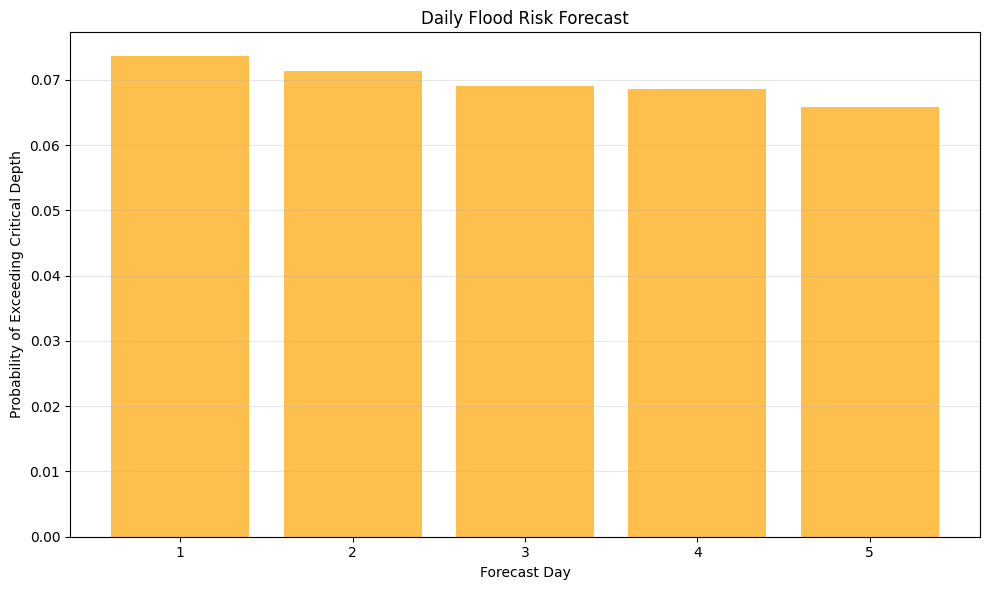

Overall probability of flooding in next 5 days: 0.3046
Expected maximum flood depth: 0.53 m


In [11]:
def real_time_flood_risk(recent_rainfall, forecast_days=5, n_simulations=1000, critical_depth=0.5):
    """
    Real-time flood risk assessment using recent rainfall data and Monte Carlo forecast

    Parameters:
    -----------
    recent_rainfall : array-like
        Recent rainfall measurements from sensors
    forecast_days : int
        Number of days to forecast
    n_simulations : int
        Number of Monte Carlo simulations
    critical_depth : float
        Critical flood depth threshold
    """
    # Extract rainfall distribution parameters
    non_zero_rain = rain_df['rainfall'][rain_df['rainfall'] > 0]
    gamma_params = stats.gamma.fit(non_zero_rain)
    p_rain = len(non_zero_rain) / len(rain_df)

    # Initialize arrays for results
    max_depths = np.zeros(n_simulations)
    exceeds_critical = np.zeros(n_simulations, dtype=bool)
    all_depths = np.zeros((n_simulations, forecast_days))

    # For each simulation
    for i in range(n_simulations):
        # Generate forecast rainfall
        forecast_rainfall = generate_rainfall_scenario(forecast_days, p_rain, gamma_params)

        # Combine with recent rainfall for continuity
        combined_rainfall = np.concatenate([recent_rainfall[-5:], forecast_rainfall])

        # Calculate streamflow (with memory effect from recent rain)
        streamflow = rainfall_runoff_model(combined_rainfall)

        # Only look at the forecast period streamflow
        forecast_streamflow = streamflow[-forecast_days:]

        # Calculate flood depth
        flood_depth = flood_model(forecast_streamflow)

        # Store results
        max_depths[i] = np.max(flood_depth)
        exceeds_critical[i] = np.any(flood_depth > critical_depth)
        all_depths[i, :] = flood_depth

    # Calculate risk metrics
    exceedance_probability = np.mean(exceeds_critical)
    expected_max_depth = np.mean(max_depths)

    # Calculate daily exceedance probabilities
    daily_exceedance = np.mean(all_depths > critical_depth, axis=0)

    return {
        'exceedance_probability': exceedance_probability,
        'expected_max_depth': expected_max_depth,
        'max_depths': max_depths,
        'daily_exceedance': daily_exceedance
    }

# Simulate recent rainfall data from sensors
recent_rainfall = rain_df['rainfall'].values[-10:]

# Run real-time risk assessment
rt_risk = real_time_flood_risk(recent_rainfall, forecast_days=5, n_simulations=5000)

# Visualize forecast risk
plt.figure(figsize=(10, 6))
days = np.arange(1, 6)
plt.bar(days, rt_risk['daily_exceedance'], color='orange', alpha=0.7)
plt.xlabel('Forecast Day')
plt.ylabel('Probability of Exceeding Critical Depth')
plt.title('Daily Flood Risk Forecast')
plt.xticks(days)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Overall probability of flooding in next 5 days: {rt_risk['exceedance_probability']:.4f}")
print(f"Expected maximum flood depth: {rt_risk['expected_max_depth']:.2f} m")



**Sources:**
- [(1) Designing flash flood control measures for urban areas using the Monte Carlo water flow simulation](https://www.semanticscholar.org/paper/52f42e3e8554b11b1a3f26a4add49269396c11f8)
- [(2) Monte Carlo-based sensitivity analysis of the RIM2D hydrodynamic](https://nhess.copernicus.org/articles/25/975/2025/)
- [(3) Flood risk assessment using machine learning, hydrodynamic](https://iwaponline.com/jh/article/26/8/1852/103822/Flood-risk-assessment-using-machine-learning)
- [(4) An Assessment of Uncertainties in Flood Frequency Estimation Using
Bootstrapping and Monte Carlo Simulation](https://www.semanticscholar.org/paper/2c499120ee6113f3fbe23fae57d339c775e6690f)
- [(5) PDF A Monte Carlo Simulation Study of the Factors Influencing the
…](https://theses.ncl.ac.uk/jspui/bitstream/10443/5405/1/Duque%20Y%202021.pdf)
- [(6) PDF Assessing erosion and flood risk in the coastal zone through the …](https://eartharxiv.org/repository/object/1956/download/4093/)
- [(7) A Monte Carlo simulation approach for flood risk assessment](https://www.semanticscholar.org/paper/92cb9491846d1b6ade2daf9b7281e306d95cf02e)
- [(8) SARIMA Model-Based Monte Carlo Simulation of Option Contract Design
for Maize Seasonal Heavy Precipitation in Shenyang](https://www.semanticscholar.org/paper/f94a8d506a7d9b674a8e5f70fac993d0b0df5bec)
- [(9) Risk management of a torrential flood construction project using the Monte Carlo simulation](https://www.semanticscholar.org/paper/34e28561610e19879570b3e2d49cb14332cc6067)
- [(10) Reliability Coupled Sensitivity Analysis of Water-Front GRS Wall Using Monte Carlo Simulation](https://www.semanticscholar.org/paper/55f0295bf03f51d1c138f6f0981da99cda3a970b)
- [(11) Monte Carlo Flood Risk Analysis](https://www.techwarms.org/monte-carlo-flood-risk-analysis)
- [(12) Multi‐Level Monte Carlo Models for Flood Inundation Uncertainty](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2022WR032599)
- [(13) Monte Carlo based Risk Analysis of Unmanned Aerial Vehicle Flights
over Construction Job Sites](https://www.semanticscholar.org/paper/1c5d837d9fc6d001992e65bbf6e15c5e0421d179)
- [(14) Flood forecasting using an improved NARX network based on wavelet
analysis coupled with uncertainty analysis by Monte Carlo simulations: a
case study of Taihu Basin, China](https://www.semanticscholar.org/paper/81c0e1556e0c1b409bcf9fc4e5de65994c0c26b1)
- [(17) Probabilistic Flood Hazard Maps from Monte Carlo Derived Peak](https://www.mdpi.com/2076-3417/11/14/6629)
- [(18) Flood modelling using synthesised citizen science urban streamflow](https://onlinelibrary.wiley.com/doi/10.1111/jfr3.12498)
- [(20) PDF MONTE CARLO SIMULATION OF FLOOD FREQUENCY CURVES](https://ewater.org.au/archive/crcch/archive/pubs/pdfs/technical200104.pdf)
- [(21) A New Modeling Approach for Spatial Prediction of Flash Flood with…](https://www.mdpi.com/2072-4292/12/9/1373)
- [(23) Flood Risk Analysis Simulation - Hydrologic Engineering Center](https://www.hec.usace.army.mil/confluence/watdocs/watug/simulations/flood-risk-analysis-simulation)
- [(24) Overlooking probabilistic mapping renders urban flood risk](https://www.nature.com/articles/s43247-023-00940-0)
- [(25) A Comparison of Machine Learning Models for Predicting Flood](https://www.mdpi.com/2071-1050/15/20/14928)
